In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

%matplotlib inline

#load book1 csv data as dataframe
df = pd.read_csv('Book1.csv')

df.head(5)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


In [5]:
#drop duplicates and null ID data lines
df.dropna(inplace = True, subset = ["Id"])
df.drop_duplicates(inplace = True, subset = ["Id"])

#convert datatype of date column to datetime64
df["Date"] = df["Date"].replace('', None)
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%dT%H:%M:%S.%fZ")
#df["Date"] = df["Date"].astype("datetime64[ns]")  #this line doesn't work on some versions 

#convert ID to integer data type
df["Id"] = df["Id"].astype(int)
df.dtypes

Id                            int32
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
dtype: object

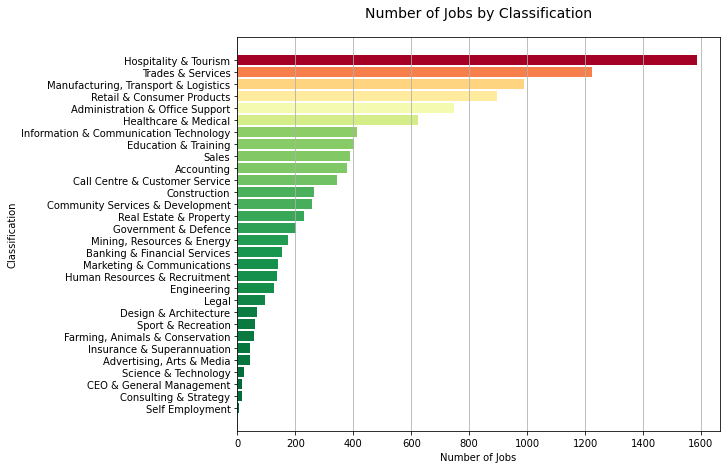

In [ ]:
#group data by classification and sort in ascending order
counts_df = df.groupby('Classification').size().reset_index(name='Number of Jobs')
counts_df.head(5)
counts_df = counts_df.sort_values(by='Number of Jobs', ascending=True)

#create plt plot
fig, ax = plt.subplots(figsize=(10,6))
#select colour map of graph
colors = plt.cm.RdYlGn_r(counts_df["Number of Jobs"] / counts_df["Number of Jobs"].max())

#generate horizontal bar graph and graph characteristics for jobs by classification
bar = ax.barh(counts_df["Classification"], counts_df["Number of Jobs"], color=colors)
plt.tight_layout()
plt.title("Number of Jobs by Classification", pad=20, fontsize=14)
ax.set_xlabel("Number of Jobs")
ax.set_ylabel("Classification")
ax.grid(axis='x')

In [ ]:
import matplotlib

#create dataframe for salary ranges
salary_df = pd.DataFrame(df, columns=["LowestSalary", "HighestSalary"])
salary_df = salary_df[salary_df["LowestSalary"] >= 0]
salary_df = salary_df[salary_df["HighestSalary"] >= 0]
#get salary range data from low to high
salary_df = salary_df.assign(SalaryRange = df["LowestSalary"].astype(str) + '-' + df["HighestSalary"].astype("str"))
#group data and count total occurances of salary range
salary_counts = salary_df.groupby('SalaryRange').size().reset_index(name='Count')

salary_counts.head()

,SalaryRange,Count
0,0-30,3894
1,30-40,1842
2,40-50,2519
3,50-60,1844


Text(0.5, 1.0, 'Job Posts by Salary Range')

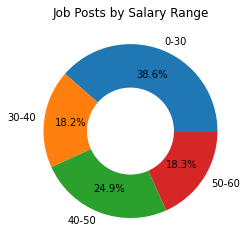

In [ ]:
#salary ranges plot
plt.pie(salary_counts["Count"], labels=salary_counts["SalaryRange"], autopct='%1.1f%%', pctdistance=0.7)
 
#adding center circle in Pie chart
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
plt.gca().add_artist(centre_circle)
plt.title("Job Posts by Salary Range") 


In [ ]:
#organise location data using groupby location 
locationDf = df[df['Location'].isna()==False]
locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Id"]
locationDf.head(5)

,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Location,Count
Location,,,,,,,,,,,,,,
ACT,238,238,235,238,0,238,238,238,235,238,238,236,ACT,238
Adelaide,390,390,356,390,0,390,390,390,374,390,390,374,Adelaide,390
Adelaide Hills & Barossa,19,19,18,19,0,19,19,19,19,19,19,19,Adelaide Hills & Barossa,19
Albany & Great Southern,10,10,10,10,0,10,10,10,10,10,10,10,Albany & Great Southern,10
Albury Area,19,19,18,19,0,19,19,19,19,19,19,19,Albury Area,19


Text(0.5, 1.0, 'Job Posts by Location')

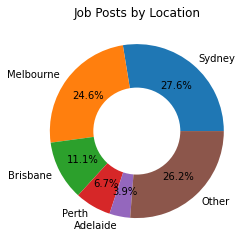

In [ ]:
#get top 5 locations for job posts by count
locationDf = locationDf.sort_values(by='Count', ascending=False)
locationDf_5 = locationDf.loc[:, ["Location", "Count"]].head(5)
locationDf_5.head()

#get other locations data and sum the total count
locationDf_other = locationDf.iloc[5:]
total_other = locationDf_other['Count'].sum()
new_row = ['Other', total_other]

#insert summed data into top 5 location data as other
locationDf_5.loc[-1] = new_row
locationDf_5.head(10)

#oie char for job market share of cities
plt.pie(locationDf_5["Count"], labels=locationDf_5["Location"], autopct='%1.1f%%', pctdistance=0.7,)
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
plt.gca().add_artist(centre_circle)
plt.title("Job Posts by Location") 

